#Uloha 2 Vizualizace Dat


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly as py
import datetime as dt


In [9]:
# převod .csv na pd.DataFrame
df = pd.read_csv("/content/netflix_titles.csv", encoding='latin1')
df = df[df.columns[:12]]  # some bugs
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
#počet chybějících údajů
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [15]:
# nahrazení dat NaN řetězcem "No data".
df['cast'].replace(np.nan, 'No Data', inplace  = True)
df['director'].replace(np.nan, 'No Data', inplace  = True)
# nahrazení NaN nejběžnější zemí
df["country"].mode()[0]
df['country'] = df['country'].fillna(df['country'].mode()[0])

df.dropna(inplace=True)
df.isnull().sum()

df["date_added"] = df["date_added"].str.strip()

df["date_added"] = pd.to_datetime(df['date_added'])
df['month_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021


<Axes: ylabel='count'>

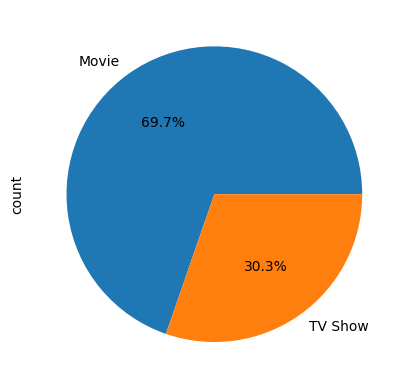

In [17]:
df["type"].value_counts().plot.pie(autopct='%1.1f%%')

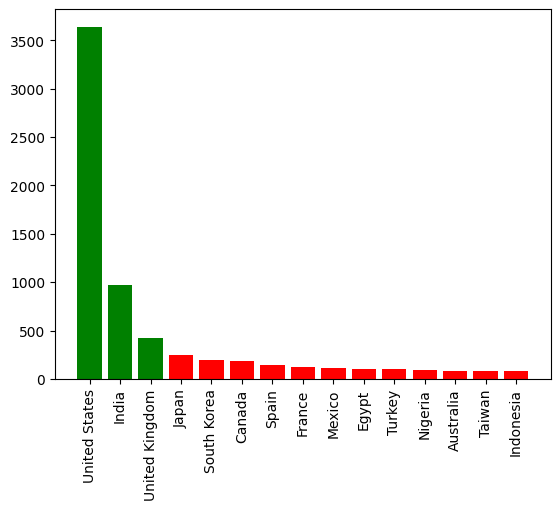

In [30]:
common_countries = df["country"].value_counts().head(15)
plt.bar(common_countries.index, common_countries.values, color = "red")
plt.bar(common_countries.index[:3], common_countries.values[:3], color="green")
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'Release year')

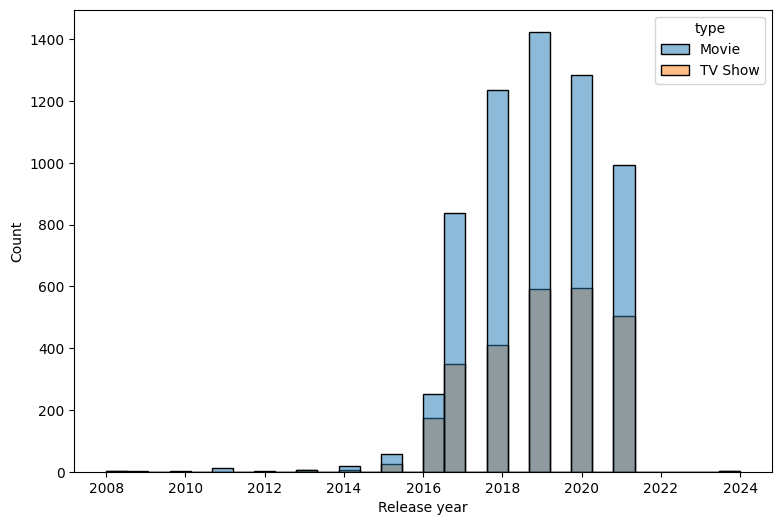

In [41]:
plt.figure(figsize=(9,6))
sns.histplot(data=df, x=df['year_added'].sort_values(ascending=False), bins=30, hue='type')
plt.xlabel('Release year')

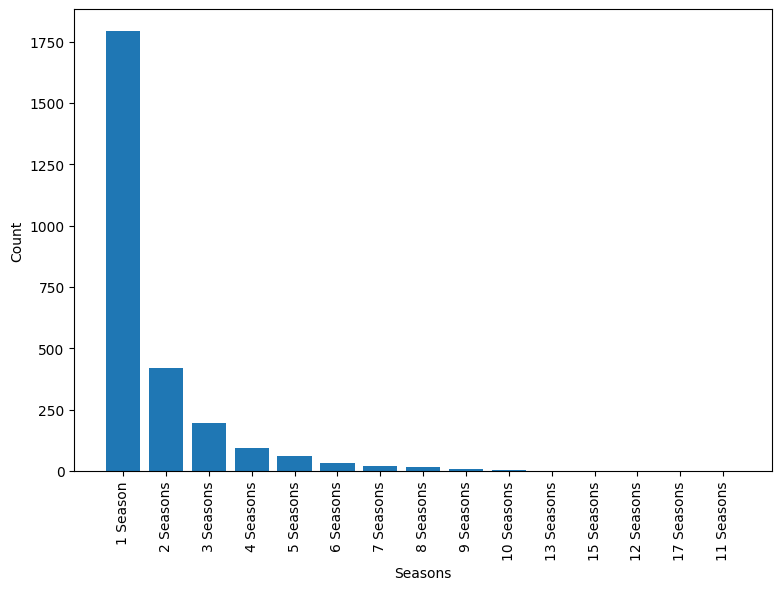

In [50]:
df_tvshow = df.loc[df['type'] == 'TV Show']
df_tvshow = df_tvshow['duration'].value_counts()
plt.figure(figsize=(9,6))
plt.bar(df_tvshow.index, df_tvshow.values)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('Seasons')
plt.show()

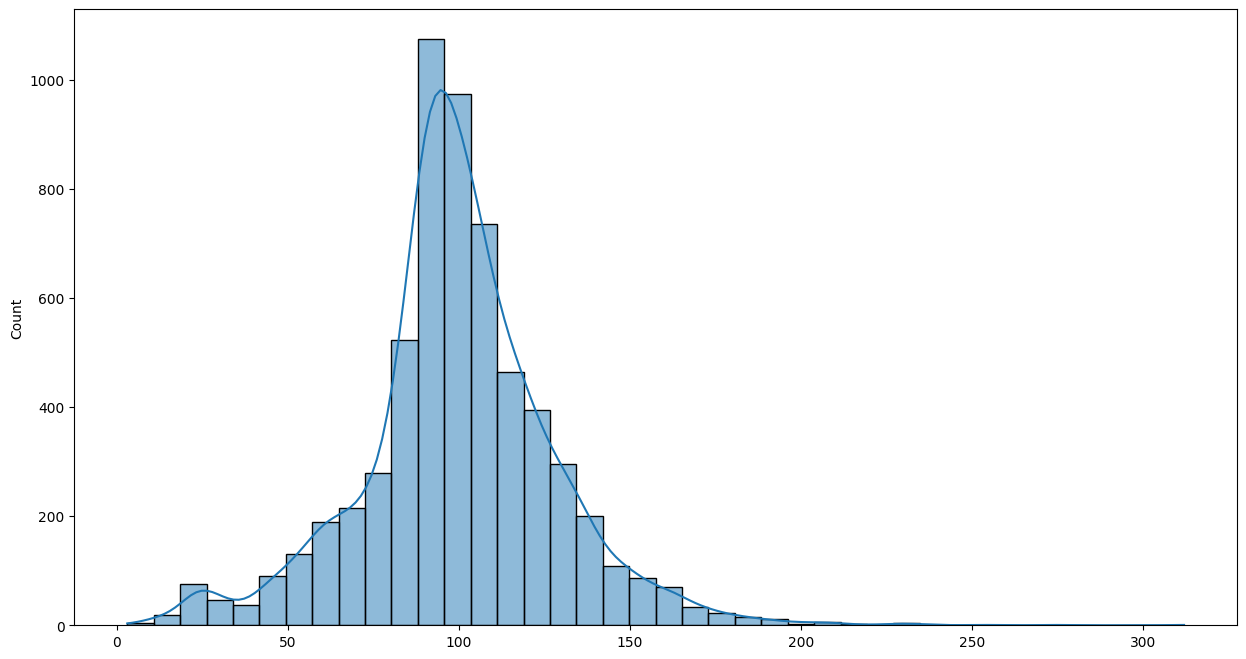

In [66]:
df_movie = df[df['type'] == 'Movie']["duration"].str.extract('(\d+)').astype(float)
plt.figure(figsize=(15, 8))
sns.histplot(data=df_movie, kde=True, bins=40, legend = False)
plt.show()